In [20]:
#Author: Sanika Dhawale

import pandas as pd #data manupulating and analysis tool, build on top of NumPy
import numpy as np #NumPy is a Python library used for working with arrays and multidimensional arrays
import seaborn as sns #Data visualization using matplotlib

#importing items from sklearn library
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [21]:
df = pd.read_csv('IBM HR Analytics Employee Attrition Prediction.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [22]:
df.describe() #returns description of the data in the DataFrame

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
df.info() #gives non-null values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
df.groupby('Attrition').size()

Attrition
No     1233
Yes     237
dtype: int64

In [25]:
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0] #encodes input as integer
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
#printing the unique values 
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 886
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


In [27]:
#As we see here EmployeeCount, OverTime, Standardhours have just 1 unique value, so we will drop the following columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [28]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [29]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

#have split the training and test data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
#calculates the standard deviation value (varience) for each entry
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,-1.958919,-0.413973,-0.036578,-0.547908,-0.867017,-1.009049,-1.343310,-0.998443,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
1,-0.430695,1.176070,0.699024,-0.449557,1.532088,1.404772,0.478372,0.010293,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
2,1.643324,1.296833,0.208623,0.829007,-0.737494,1.017664,-0.302349,-0.325952,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
3,-1.085648,-0.549831,-0.894779,1.074884,-0.860942,-1.130107,-0.692709,-0.494075,2.135922,-1.569919,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
4,-0.321536,-1.274408,-0.894779,0.484778,-0.936660,-0.435997,-0.692709,-0.494075,2.135922,-1.569919,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247


In [31]:
#Logistic Regression Model
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

print('TRAINING RESULTS')
print('___________________________________________________________')
print('Classification report')
print(classification_report(y_train,lr_clf.predict(X_train)))
print('Accuracy score:',accuracy_score(y_train, lr_clf.predict(X_train)))
print('ROC AUC: ', roc_auc_score(y_train,lr_clf.predict(X_train)))
print('\nTESTING RESULTS')
print('___________________________________________________________')
print('Classification report')
print(classification_report(y_test,lr_clf.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, lr_clf.predict(X_test)))
print('ROC AUC: ', roc_auc_score(y_test,lr_clf.predict(X_test)))

TRAINING RESULTS
___________________________________________________________
Classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       863
           1       0.88      0.64      0.75       166

    accuracy                           0.93      1029
   macro avg       0.91      0.81      0.85      1029
weighted avg       0.93      0.93      0.92      1029

Accuracy score: 0.9290573372206026
ROC AUC:  0.8141779167655558

TESTING RESULTS
___________________________________________________________
Classification report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       370
           1       0.56      0.39      0.46        71

    accuracy                           0.85       441
   macro avg       0.73      0.67      0.69       441
weighted avg       0.84      0.85      0.84       441

Accuracy score: 0.8526077097505669
ROC AUC:  0.6674533688618195


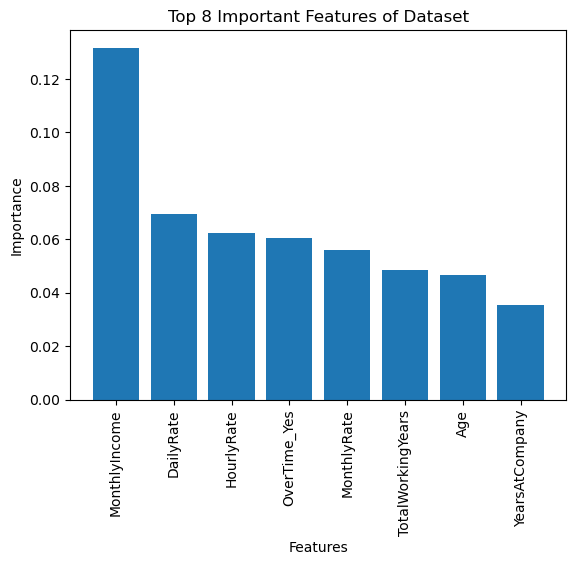

In [33]:
#displaying the top 8 important variables in the dataset
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Train a decision tree classifier on the dataset
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Extract the feature importances from the classifier
importances = clf.feature_importances_

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, X.columns), reverse=True)

# Select the top 10 features with the highest importances
top_features = pd.DataFrame(sorted_importances[:8], columns=['Importance', 'Feature'])

# Plot a bar chart to visualize the top features
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 8 Important Features of Dataset')
plt.show()


In [38]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)


print('RANDOM FOREST TRAINING RESULTS')
print('___________________________________________________________')
print('Classification report')
print(classification_report(y_train,rfc.predict(X_train)))
print('Accuracy score:',accuracy_score(y_train, rfc.predict(X_train)))
print('ROC AUC: ', roc_auc_score(y_train,rfc.predict(X_train)))
print('\nRANDOM FOREST TESTING RESULTS')
print('___________________________________________________________')
print('Classification report')
print(classification_report(y_test,rfc.predict(X_test)))
print('Accuracy score:',accuracy_score(y_test, rfc.predict(X_test)))
print('ROC AUC: ', roc_auc_score(y_test,rfc.predict(X_test)))

print(f"\n\nAccuracy of Model: {accuracy}")

RANDOM FOREST TRAINING RESULTS
___________________________________________________________
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029

Accuracy score: 1.0
ROC AUC:  1.0

RANDOM FOREST TESTING RESULTS
___________________________________________________________
Classification report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.38      0.08      0.14        71

    accuracy                           0.83       441
   macro avg       0.61      0.53      0.52       441
weighted avg       0.77      0.83      0.78       441

Accuracy score: 0.8299319727891157
ROC AUC:  0.528740007613247


Accuracy of Model: 0.

In [42]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [43]:
# Neural Network Model
import pandas as pd
import tensorflow  #One of the key features of TensorFlow is its ability to create computational graphs, which represent the flow of data through a neural network.TensorFlow also includes pre-built models for common tasks such as image classification and natural language processing, as well as tools for visualizing and debugging models.
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential  #The Sequential class is a type of model in Keras that represents a linear stack of layers. In other words, it allows you to create a model by simply adding layers to it one by one, in sequence.
from tensorflow.keras.layers import Dense #The Dense layer is a type of layer in Keras that represents a fully connected layer in a neural network.
from tensorflow.keras.optimizers import Adam  #The Adam optimizer is an adaptive learning rate optimization algorithm that is commonly used to train deep neural networks.

# Create neural network model
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.01) #During each epoch, the model trains on each example in the training dataset once and updates its parameters to minimize the loss function. 
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model's performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/100
33/33 [==============================] - 3s 4ms/step - loss: 0.4292 - accuracy: 0.8290
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.2506 - accuracy: 0.9009
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.1512 - accuracy: 0.9436
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0975 - accuracy: 0.9602
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0901 - accuracy: 0.9699
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9864
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9951
Epoch 8/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9971
Epoch 9/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.9990
Epoch 10/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 11/

In [ ]:
"""
Model Comparison

Logistic Regression Accuracy score: 0.8526077097505669

Random Forest Accuracy score: 0.8299319727891157

Neural Network Accuracy score: 0.841269850730896

"""